In [1]:
# รับไฟล์ผลลัพธ์จาก analyze.ipynb
input_rfm_csv = '../data/processed/rfm_results.csv'
output_timestamp = ''
output_figures_dir = '../reports/figures'

In [2]:
# Parameters
input_rfm_csv = "C:\\Users\\505345\\workspace_course\\adv-data-analytics-on-remote-server\\data\\processed\\rfm_results.csv"
output_timestamp = "20260209_162059"
output_figures_dir = "C:\\Users\\505345\\workspace_course\\adv-data-analytics-on-remote-server\\reports\\figures"


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

RFM = pd.read_csv(input_rfm_csv)

# สรุปจำนวนลูกค้าในแต่ละกลุ่ม (ตัวอย่างการจัดกลุ่มแบบง่าย)
segment_counts = RFM.groupby('R_Quartile').size().reset_index(name='counts')

# Calculate average values for each RFM_Level, and return a size of each segment 
RFM_desc = RFM.groupby('RFM_label').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(RFM_desc)


                Recency Frequency Monetary      
                   mean      mean     mean count
RFM_label                                       
About To Sleep      8.9       1.0    569.7    13
Can’t Lose Them     9.7       1.0    289.1    30
Hibernating        14.6       1.0    292.0    31
Lost               20.4       1.0    103.2    47
Promising           4.5       1.0    669.9    10


✅ Figure saved to: C:\Users\505345\workspace_course\adv-data-analytics-on-remote-server\reports\figures\customer_segments_treemap_20260209_162059.png


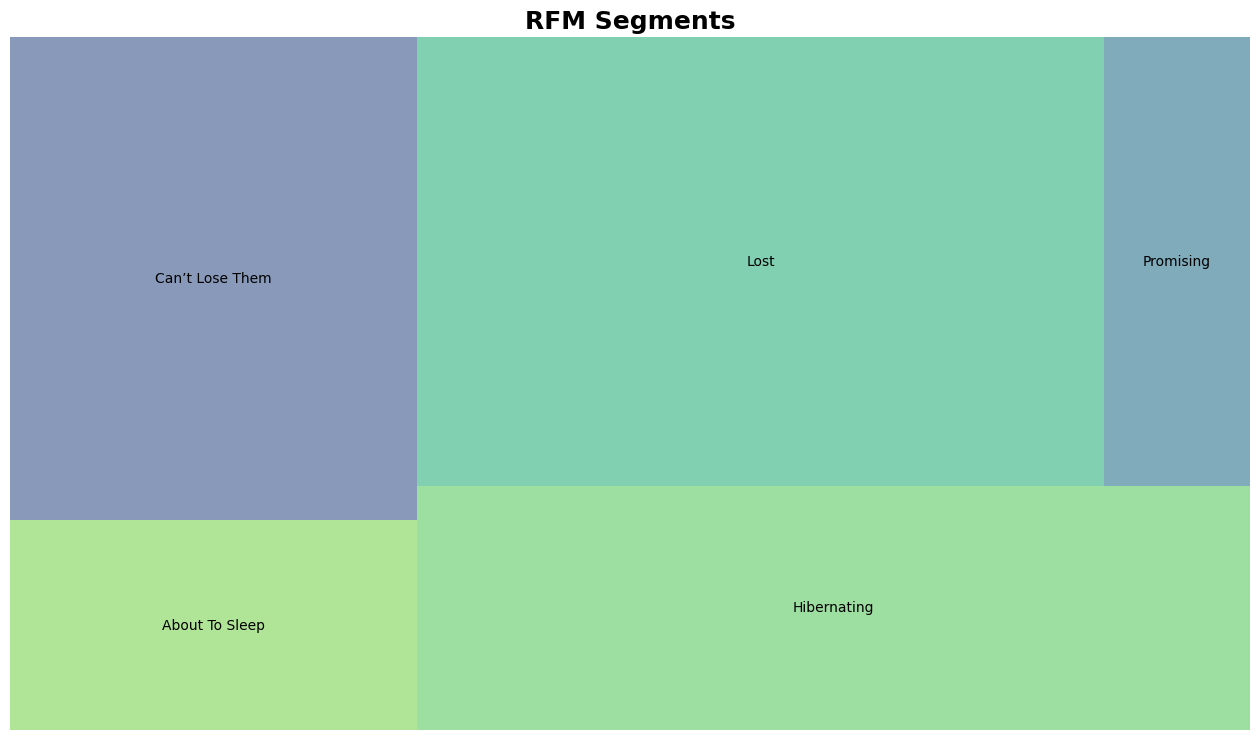

In [4]:
from pathlib import Path

# สร้าง TreeMap
if isinstance(RFM_desc.columns, pd.MultiIndex):
    RFM_desc.columns = RFM_desc.columns.droplevel()
RFM_desc.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=RFM_desc['Count'], 
              label=RFM_desc.index.tolist(),  # Use actual segment names from the index
              alpha=.6)

plt.title("RFM Segments", fontsize=18, fontweight="bold")
plt.axis('off')

# บันทึกไฟล์
Path(output_figures_dir).mkdir(parents=True, exist_ok=True)

if output_timestamp:
    output_path = Path(output_figures_dir) / f'customer_segments_treemap_{output_timestamp}.png'
else:
    output_path = Path(output_figures_dir) / 'customer_segments_treemap.png'

plt.savefig(str(output_path), dpi=300, bbox_inches='tight')
print(f"✅ Figure saved to: {output_path}")

plt.show()


